# Higher Order ODEs

So far we have only applied ODE solving techniques to first order ODEs, but it's not too hard to apply them to second and higher order problems.

$\large \frac{d^2y}{dx^2} = f(x,y,\frac{dy}{dx})$

Let's say you want to solve such an ODE over the domain $[a,b]$. For an initial value problem you need the value of $y$ and $\frac{dy}{dx}$ at the first point in the domain, $a$.

$\large y(a) = A~~~$ and $~~~\large \frac{dy}{dx}\rvert_{x=a} = B$

What we do now is transform the 2nd order ODE into two first order ODEs as follows:

First define, $w$

$\large w = \frac{dy}{dx}$

So that now the original equation can be written as:

$\large \frac{dw}{dx} = \frac{d^2y}{dx^2}$


Now the IVP us transformed to solving the two following ODEs:


$\large \frac{dy}{dx} = w~~~~~~y(a) = A$

$\large \frac{dw}{dx} = f(x,y,w)~~~~~w(a)=B$

Now we can solve these two ODEs simultaneously using any of the techniques we have used before: Heun's method, RK, etc...





## Project Prep

The project will involve modeling a certain system that serves as a model for many real applications - a spring-mass-damper system. To start with we will model the non-forced (i.e. $F=0$) as shown below:

![image info](./spring_mass_damper.png)

The governing equation for determining the x versus time is: 

$\large \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + k x = F(t)/m$

Here, $k$ is the spring constant, and $\gamma$ is the damping factor.

For now take the values above as follows:

$k = $48 N/m/kg

$\gamma = $0.7 1/s

$x(0)=0$

$\frac{dx}{dt}\rvert_{t=0}$=0.2 m/s

$0 <= t <= 5$ s

$F(t) = 0$

### Assignment
By Wednesday Dec. 1, solve the 2nd order ODE above using RK3 for the specified values.


#### Step 1 - Rewrite as two ODEs:

*Equation 1:* $f_x=\frac{dx}{dt} = v$ subject to $x(t=0)= 0$m.

*Equation 2:* $f_v=\frac{dv}{dt} = -2 \gamma v + -k x$ subject to $v(t=0)=0.2$m/s

#### Step 2 - Solution Planning:
Note since there are two interdependent ODEs, for each step we have to solve each ODE for *i+1*. Note, we are using an explicit method so each value of $x_{i+1}$ and $v_{i+1}$ can be calculated independently. Here we are using RK3, but the expressions below just indicate *Slope* where we will be using RK3.

1. Find $x_{i+1}$ using Equation 1: $x_{i+1} = x_i + Slope(t_i,x_i,v_i) h$
2. Find $v_{i+1}$ using Equation 2: $v_{i+1} = v_i + Slope(t_i,x_i,v_i) h$







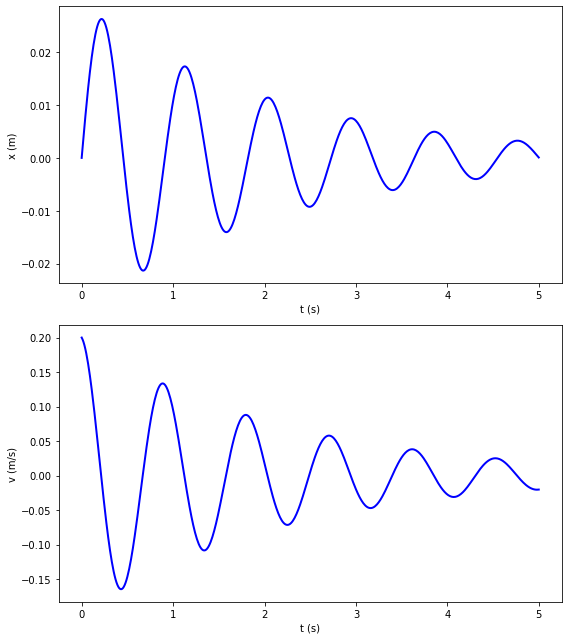

In [11]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
#RK3 constants
c1 = 1./6
c2 = 4./6
c3 = 1./6
a2 = 1./2
a3 = 1.
b21 = 1./2
b31 = -1.
b32 = 2.

F_over_m = lambda t: 0                   #5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v - k*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk3_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk3_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()